### Import dataset

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, KFold

In [3]:
df = pd.read_csv('./SRC/aerogerador2.dat', sep=' ')

In [4]:
df.columns = ['Null', 'Speed', 'Potency']

In [5]:
df = df.drop(columns='Null')

### Analisy and plot

<AxesSubplot:xlabel='Speed', ylabel='Potency'>

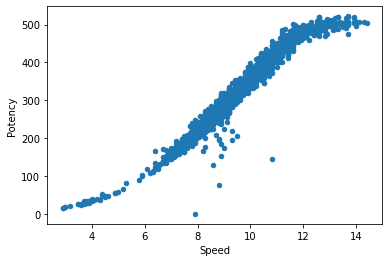

In [6]:
df.plot.scatter('Speed','Potency')

### Apply linear regression model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Potency'), df['Potency'], test_size=0.25, shuffle=True)

In [8]:
model = LinearRegression().fit(X_train, y_train)
predict = model.predict(X_test)

### Results

In [9]:
mean_absolute_error(y_test, predict)

15.366901411912743

In [10]:
mean_squared_error(y_test, predict)

554.681638041448

In [11]:
np.sqrt(mean_squared_error(y_test, predict))

23.551680153259724

### Polynomial regression

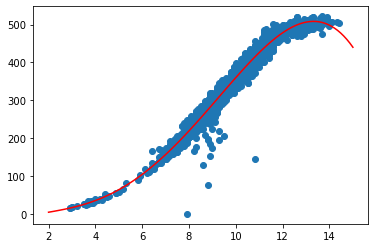

In [12]:
test = np.polyfit(df['Speed'], df['Potency'], 4)
mymodel = np.poly1d(test)

myline = np.linspace(2, 15, 100)

plt.scatter(df['Speed'], df['Potency'])
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [13]:
from scipy import stats
df_no_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_no_outliers.head()

,Speed,Potency
26,4.2,40.0
27,4.3,38.0
28,4.4,52.0
29,4.4,46.0
30,4.5,45.0


### Poly metrics

In [14]:
y_predict  = []
for i in X_test['Speed'].values:
    y_predict.append(mymodel(i))

Metrics

In [15]:
mean_absolute_error(y_test, y_predict)

10.16063906005643

In [16]:
mean_squared_error(y_test, predict)

554.681638041448

In [17]:
np.sqrt(mean_squared_error(y_test, predict))

23.551680153259724

### Results

In the graph, we see that the data closely resembled a third-degree curve. However, used as two regression techniques for this dataset. As expected, the polynomial regression had better results, however the linear regression had interesting results, not having a very high error. This fact is due to the fact that between speed values ​​5 and 12, the power value remains as a straight line.

/home/geovane/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed'>

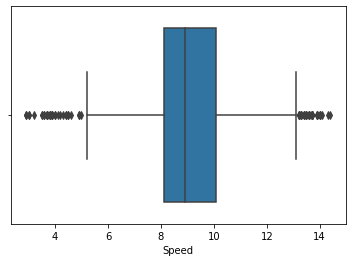

In [18]:
sb.boxplot(df['Speed'])

In [19]:
from sklearn.ensemble import IsolationForest

In [49]:
clf = IsolationForest()

X_train = df['Speed']
X_train = np.asarray(X_train)
X_train = X_train.reshape(-1, 100)
clf.fit(df)

ValueError: cannot reshape array of size 2238 into shape (100)

In [46]:
predict = clf.predict(df)

In [47]:
for i in predict:
    print(i)

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
-1
1
-1
1
1
1
1
1
1
1
1
1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
1
1
1
1
1
1
1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
